      Voltage    Current  AmbientTemp       Load  RunningTime   TempRise
0  218.727006  11.420316    21.546858  58.446753    87.796250  45.346533
1  247.535715   5.841400    33.538294  63.929517    26.779295  42.769695
2  236.599697   6.616287    27.578786  58.850524    73.391720  45.453154
3  229.932924  13.985542    32.396862  54.435127    76.738655  54.159587
4  207.800932  11.064291    24.800744  56.031794    56.654374  44.810492
Decision tree R² score : 0.2144
Decision tree MAE : 3.1630
Decision Tree RMSE : 3.9711


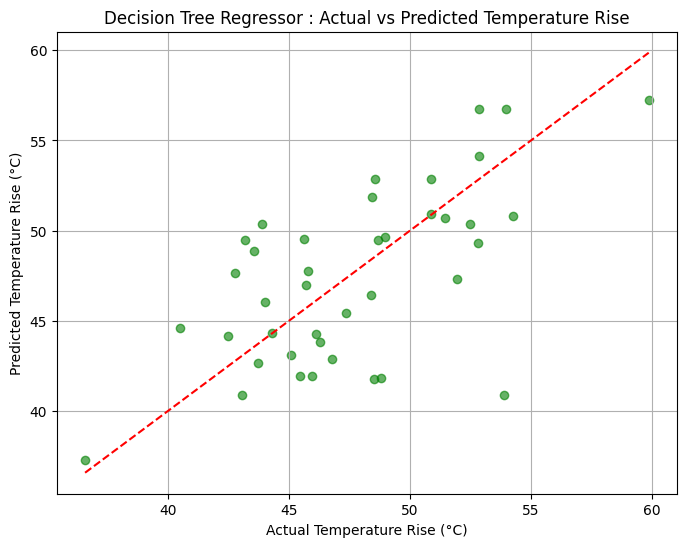


Predicted Temperature Rise for new data: 53.196392110977506 °C


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------------------------
# Step 1: Synthetic Dataset
# ---------------------------
np.random.seed(42)
n_samples = 200

voltage = np.random.uniform(200, 250, n_samples)           # in Volts
current = np.random.uniform(5, 15, n_samples)              # in Amps
ambient_temp = np.random.uniform(20, 35, n_samples)        # °C
load = np.random.uniform(50, 100, n_samples)               # %
running_time = np.random.uniform(10, 120, n_samples)       # minutes

# Temperature rise model (synthetic physics-inspired relation)
temp_rise = (
    0.05 * voltage +
    0.8 * current +
    0.6 * ambient_temp +
    0.1 * load +
    0.07 * running_time +
    np.random.normal(0, 2, n_samples)  # noise
)
df = pd.DataFrame({
    "Voltage": voltage,
    "Current": current,
    "AmbientTemp": ambient_temp,
    "Load": load,
    "RunningTime": running_time,
    "TempRise": temp_rise
})
print(df.head())

X = df[["Voltage", "Current", "AmbientTemp", "Load", "RunningTime"]]
y = df["TempRise"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)

dt_r2 = r2_score(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_y_pred))

print(f"Decision tree R² score : {dt_r2:.4f}")
print(f"Decision tree MAE : {dt_mae:.4f}")
print(f"Decision Tree RMSE : {dt_rmse:.4f}")

plt.figure(figsize = (8,6))
plt.scatter(y_test, dt_y_pred, color="green", alpha = 0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color = "red", linestyle = "--")
plt.xlabel("Actual Temperature Rise (°C)")
plt.ylabel("Predicted Temperature Rise (°C)")
plt.title("Decision Tree Regressor : Actual vs Predicted Temperature Rise")
plt.grid(True)
plt.show()

new_data = pd.DataFrame({
    "Voltage": [230],
    "Current": [10],
    "AmbientTemp": [30],
    "Load": [80],
    "RunningTime": [60]
})
predicted_temp = dt_model.predict(new_data)
print("\nPredicted Temperature Rise for new data:", predicted_temp[0], "°C")




**Result using Linear Regresion**
Predicted Temperature Rise for new data: 49.92456710861345 °C

**Result using Decision Tree**
Predicted Temperature Rise for new data: 53.196392110977506 °C